In [1]:
import pandas as pd
import numpy as np
import ast
from collections import defaultdict

In [2]:
rolls = ast.literal_eval(open('records-final.json','r').readlines()[0])

In [3]:
id_name_dict = {85182215931064320: "old_user", 657683377725636608: "klutz", 657683377725636619: "klutz", 978030120734445628: 'Mikasino Bot', 138336085703917568: 'mikes fargo', 251112534231220224: 'superharvey', 251112534231220225: 'superharvey', 202600215255973888: 'Pinscher', 256301302886301696: 'sandmanggg', 376970858859593728: 'beetknee', 202278676199374848: 'Matt', 178957301485535232: 'Mikey S.', 432610292342587392: 'Mudae', 88020501930209280: 'Chaosfnog', 469706380220170240: 'lilabeth', 657683377725636619: 'klutz', 464498521349816320: 'Tim G', 279870739451084800: 'armadillo'}
user_id_to_nickname = defaultdict(lambda: "old_user", id_name_dict)

In [4]:
test_dict = defaultdict(lambda: 0)

In [5]:
rolldf_old = pd.DataFrame.from_records(rolls)
rolldf_old.columns = ['roller','name','value', 'date', 'wished', 'claimed']
rolldf = rolldf_old[~rolldf_old['roller'].isna()]
rolldf.loc[:,'roller'] = rolldf['roller'].apply(lambda x: user_id_to_nickname[int(x)])

In [6]:
from collections import Counter

In [7]:
rolldf['wished'] = rolldf['wished'].apply(lambda x: x if ((x != "") and (not pd.isna(x))) else None)
rolldf['claimed'] = rolldf['claimed'].apply(lambda x: x if ((x != "") and (not pd.isna(x))) else None)

In [8]:
rolldf[(~rolldf['wished'].isna()) & (rolldf['claimed'].isna())]

,roller,name,value,date,wished,claimed
26611,lilabeth,Ash's Infernape,69,"06/12/2022, 18:52:19",2.563013e+17,NaN
73773,beetknee,Fischl,262,"05/21/2022, 05:12:54",3.769709e+17,NaN
75542,lilabeth,Echidna,549,"05/20/2022, 08:55:45",3.769709e+17,NaN
108546,old_user,Maki Zenin,552,"05/05/2022, 10:14:11",2.798707e+17,NaN
114027,old_user,Korra,226,"05/02/2022, 21:50:44",2.511125e+17,NaN
121846,old_user,Mew,192,"04/26/2022, 00:16:52",8.518222e+16,NaN


In [9]:
claims = rolldf[~rolldf['claimed'].isna()]

In [10]:
claims.sort_values(['value'], ascending=False)

,roller,name,value,date,wished,claimed
4978,superharvey,Rem,1458,"06/23/2022, 16:44:18",2.511125e+17,2.511125e+17
9807,armadillo,Asuna,1374,"06/21/2022, 05:08:00",2.798707e+17,2.511125e+17
69478,armadillo,Mai Sakurajima,1151,"05/23/2022, 12:05:24",2.798707e+17,2.798707e+17
68205,armadillo,Mikasa Ackerman,1150,"05/24/2022, 01:57:10",2.798707e+17,2.798707e+17
34919,armadillo,Ram,1138,"06/08/2022, 15:40:55",2.798707e+17,2.798707e+17
...,...,...,...,...,...,...
116115,armadillo,Chip (FV),27,"05/01/2022, 08:45:11",NaN,3.769709e+17
116195,Mikey S.,Spooky Spoon,27,"05/01/2022, 07:18:08",NaN,1.789573e+17
115310,mikes fargo,Ramos's Jumpluff,27,"05/02/2022, 00:56:49",NaN,2.563013e+17
121743,old_user,Drowsy,26,"04/26/2022, 02:19:08",NaN,2.511125e+17


In [11]:
chars_claimed = {user_id_to_nickname[k]:v for k,v in dict(Counter(claims['claimed'])).items()}

In [12]:
char_claim_sum = {user_id_to_nickname[k]: v for k,v in claims.groupby(['claimed']).sum().sort_values(['value'], ascending = False)[['value']].to_dict()['value'].items()}

In [13]:
avg_claim_val = {k:(char_claim_sum[k] / chars_claimed[k]) for k in chars_claimed.keys()}

In [52]:
pd.Series(chars_claimed).sort_values(ascending=False)

armadillo      585
beetknee       580
superharvey    559
lilabeth       475
Chaosfnog      454
klutz          247
mikes fargo    212
Matt           164
sandmanggg     106
Mikey S.        72
Pinscher        61
Tim G            3
dtype: int64

In [14]:
pd.Series(avg_claim_val).sort_values(ascending=False)

armadillo      191.531624
beetknee       187.898276
superharvey    185.914132
lilabeth       166.242105
mikes fargo    159.216981
Chaosfnog      136.960352
Matt           130.817073
Mikey S.       120.152778
klutz          113.672065
sandmanggg     111.292453
Pinscher        64.754098
Tim G           55.333333
dtype: float64

In [15]:
claims['date'].min(), claims['date'].max()

('04/25/2022, 06:57:26', '06/25/2022, 21:47:17')

In [16]:
from dateutil import parser

In [17]:
import datetime

In [18]:
parser.parse(claims['date'].min())

datetime.datetime(2022, 4, 25, 6, 57, 26)

In [21]:
claims.loc[:, 'dateparse'] = claims.loc[:,'date'].apply(parser.parse)

/var/folders/v9/3_pg27y54rq24839ms3rtlm00000gn/T/ipykernel_3155/2768825277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  claims.loc[:, 'dateparse'] = claims.loc[:,'date'].apply(parser.parse)


In [79]:
totsec = int((parser.parse(claims['date'].max()) - parser.parse(claims['date'].min())).total_seconds())

In [80]:
values = {i:{} for i in list(id_name_dict.keys())}
for secbar in range(0, totsec, totsec // 1000):
    td = parser.parse(claims['date'].min()) + datetime.timedelta(seconds = secbar)
    claimeddict = claims[claims['dateparse'] < td].groupby(['claimed']).count()['roller'].to_dict()
    for k,v in claimeddict.items():
        # print(secbar)
        values[int(k)][td] = v

In [81]:
import matplotlib.pyplot as plt

In [82]:
inter_values = {k:v for k,v in values.items() if len(v) > 0}

In [83]:
pltvalues = {user_id_to_nickname[k]:v for k,v in inter_values.items()}

In [84]:
min(list(pd.DataFrame(pltvalues).index))

Timestamp('2022-04-25 08:26:09')

<AxesSubplot:>

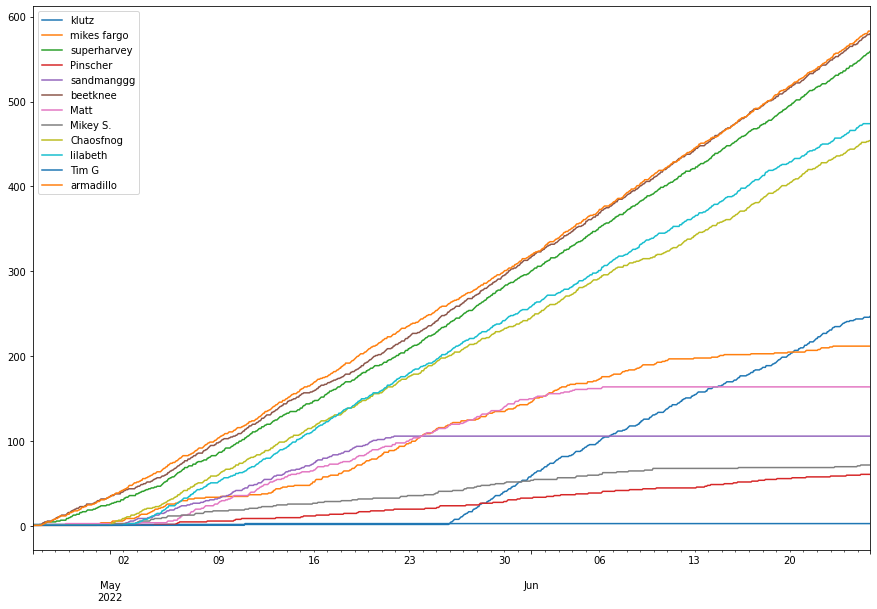

In [85]:
pd.DataFrame(pltvalues).sort_index().fillna(method = "bfill").plot(figsize = (15,10))

In [202]:
claims[claims['dateparse'] < td].groupby(['claimed']).count()['roller'].to_dict()

{2.0227867619937485e+17: 1,
 2.5111253423122022e+17: 3,
 2.798707394510848e+17: 3,
 3.769708588595937e+17: 4}

In [199]:
claims[claims['dateparse'] < td].sort_values(['claimed'])

,roller,name,value,date,wished,claimed,dateparse
122022,Matt,Mordred,347,"04/25/2022, 21:35:52",NaN,2.022787e+17,2022-04-25 21:35:52
121743,old_user,Drowsy,26,"04/26/2022, 02:19:08",NaN,2.511125e+17,2022-04-26 02:19:08
121855,superharvey,Valerie Gray,29,"04/26/2022, 00:04:01",NaN,2.511125e+17,2022-04-26 00:04:01
122069,old_user,Toge Inumaki,383,"04/25/2022, 20:08:34",NaN,2.511125e+17,2022-04-25 20:08:34
121721,superharvey,Milk Bear,79,"04/26/2022, 02:49:33",NaN,2.798707e+17,2022-04-26 02:49:33
121874,superharvey,The Fairy Godmother,30,"04/25/2022, 23:50:42",NaN,2.798707e+17,2022-04-25 23:50:42
122080,armadillo,Nezumi (Bananya),41,"04/25/2022, 19:57:28",NaN,2.798707e+17,2022-04-25 19:57:28
121786,beetknee,Athanasia de Alger Obelia,119,"04/26/2022, 01:53:22",NaN,3.769709e+17,2022-04-26 01:53:22
121865,beetknee,Ash's Bayleef,41,"04/25/2022, 23:59:43",NaN,3.769709e+17,2022-04-25 23:59:43
122132,old_user,Arceus,143,"04/25/2022, 19:40:33",NaN,3.769709e+17,2022-04-25 19:40:33


In [106]:
wishes = rolldf[~rolldf['wished'].isna()]

In [122]:
d = dict(Counter(wishes['roller']))
{i:d[i] for i in sorted(d, key=lambda x: -d[x])}

{'beetknee': 63,
 'armadillo': 38,
 'Chaosfnog': 38,
 'lilabeth': 34,
 'superharvey': 30,
 'klutz': 15,
 'mikes fargo': 11,
 'Matt': 5,
 'old_user': 5,
 'Mikey S.': 3,
 'sandmanggg': 2}

In [107]:
d = dict(Counter(wishes['wished']))

In [108]:
[(user_id_to_nickname[k],v) for k,v in {i:d[i] for i in sorted(d, key=lambda x: -d[x])}.items()]

[('beetknee', 61),
 ('armadillo', 40),
 ('superharvey', 32),
 ('lilabeth', 30),
 ('Chaosfnog', 26),
 ('mikes fargo', 14),
 ('old_user', 12),
 ('Matt', 11),
 ('Mikey S.', 8),
 ('sandmanggg', 8),
 ('old_user', 2)]

In [109]:
top_rolls = rolldf.sort_values(['value'], ascending = False).head(20)
top_rolls

,roller,name,value,date,wished,claimed
3453,beetknee,Zero Two,1479,"06/24/2022, 06:23:50",NaN,NaN
4978,superharvey,Rem,1458,"06/23/2022, 16:44:18",2.511125e+17,2.511125e+17
5426,superharvey,Mikasa Ackerman,1399,"06/23/2022, 06:53:36",NaN,NaN
9807,armadillo,Asuna,1374,"06/21/2022, 05:08:00",2.798707e+17,2.511125e+17
33257,superharvey,Mai Sakurajima,1285,"06/09/2022, 06:55:34",NaN,NaN
6486,armadillo,Miku Nakano,1273,"06/22/2022, 21:47:09",NaN,NaN
6414,armadillo,Miku Nakano,1273,"06/22/2022, 22:20:16",NaN,NaN
2442,armadillo,Violet Evergarden,1213,"06/24/2022, 19:45:31",NaN,NaN
69478,armadillo,Mai Sakurajima,1151,"05/23/2022, 12:05:24",2.798707e+17,2.798707e+17
68205,armadillo,Mikasa Ackerman,1150,"05/24/2022, 01:57:10",2.798707e+17,2.798707e+17


In [110]:
pd.Series(Counter(top_rolls['roller'].values)).sort_values(ascending=False)

armadillo      12
superharvey     3
beetknee        2
old_user        1
Chaosfnog       1
Pinscher        1
dtype: int64

In [111]:
roll_sums = defaultdict(lambda: 0)
roll_counts = defaultdict(lambda: 0)
def add_to_roll_count(r):
    roll_sums[r['roller']] += r['value']
    roll_counts[r['roller']] += 1

rolldf.apply(lambda row: add_to_roll_count(row),axis = 1);

In [112]:
roll_avgs = {}
for k in roll_sums:
    if k != "old_user":
        roll_avgs[k] = roll_sums[k] / roll_counts[k]
pd.Series(roll_avgs).sort_values(ascending=False)

armadillo      49.781714
superharvey    48.913157
beetknee       46.028322
sandmanggg     45.402059
Pinscher       45.368692
klutz          44.673440
Chaosfnog      44.145714
lilabeth       43.885038
Mikey S.       42.866667
mikes fargo    42.115212
Matt           40.982041
Tim G          37.872483
dtype: float64

In [116]:
pd.Series(Counter(rolldf[rolldf['value']>100]['roller'])).sort_values(ascending=False)

armadillo      1035
superharvey     811
beetknee        793
lilabeth        545
Chaosfnog       521
mikes fargo     260
old_user        182
klutz           180
sandmanggg      151
Matt            136
Mikey S.         76
Pinscher         27
Tim G             3
dtype: int64

In [114]:

pd.Series(roll_sums).sort_values(ascending=False)

armadillo      999119
beetknee       947493
superharvey    840915
lilabeth       743237
Chaosfnog      691057
mikes fargo    384554
klutz          277020
old_user       202613
Matt           200812
sandmanggg     154367
Mikey S.        90020
Pinscher        44053
Tim G            5643
dtype: int64

In [117]:
pd.Series(Counter(rolldf['name'])).sort_values(ascending=False).iloc[00:50]

KFP Employee                         14
Hapu's Golurk                        14
Ancient Gear Golem                   12
Liza's Lunatone                      12
Cyberdark Dragon                     12
Sanford                              12
2BDamned                             12
Kukri Enjou                          12
Ushio Kofune                         11
Lusamine                             11
Anne Faulkner                        11
Red Daemon's Dragon Scarlight        11
Dark (CCS)                           11
Cherubimon                           11
Anti-Venom                           11
Fantina's Mismagius                  11
Bili-tan 22                          11
Holy Lightning - Books               11
Lotta Hart                           10
Mimi (PC)                            10
Kotori's Mother                      10
Effect Veiler                        10
Thunder Dragon                       10
Glameow                              10
Sandy (PKMN)                         10


In [136]:
len (rolldf[rolldf['value']>83]) / len(rolldf)

0.04862791940401723

In [145]:
import json
import os

False

In [165]:
disable = cached_dict()

In [166]:
disable.get('yo')

'yohaw'

In [164]:
disable.set('yo','yohaw')

In [167]:
sum([2000 + i * 200 for i in range(0,100)])

1190000